#IMPORT

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df = df.drop(columns=['Id'], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 80)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
df = df.drop(columns=['Alley'])
df = df.drop(columns=['PoolQC'])
df = df.drop(columns=['Fence'])
df = df.drop(columns=['MiscFeature'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#EDA

I wanna analyse all features one by one for dropping some outliers and gethering cleaned data! I have already dropped some columns with few values.

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#Target

In [ ]:
df.SalePrice.value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

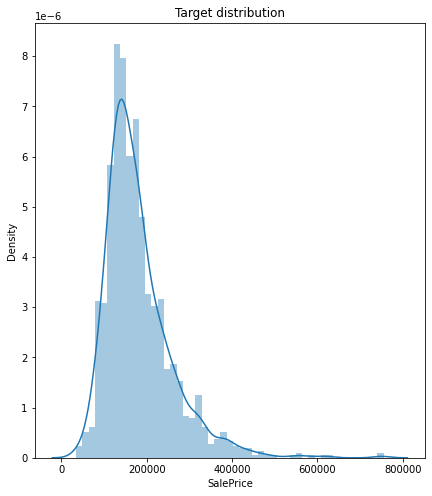

In [ ]:
plt.figure(figsize=(7,8))
sns.distplot(df['SalePrice'])
plt.title('Target distribution')
plt.show()
None

#Int

In [ ]:
df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

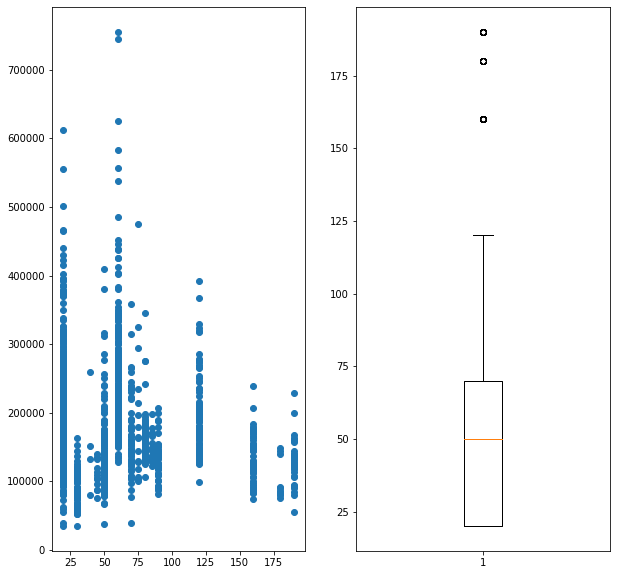

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['MSSubClass'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['MSSubClass'])
None

We see that we have some outliers in this feature. At all feature doesn't have high correlation with target.

In [ ]:
df.LotArea.value_counts()

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

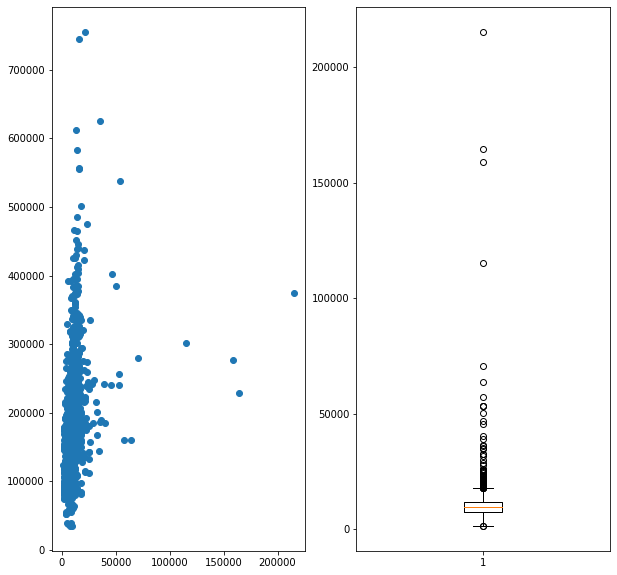

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['LotArea'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['LotArea'])
None

In [ ]:
df.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

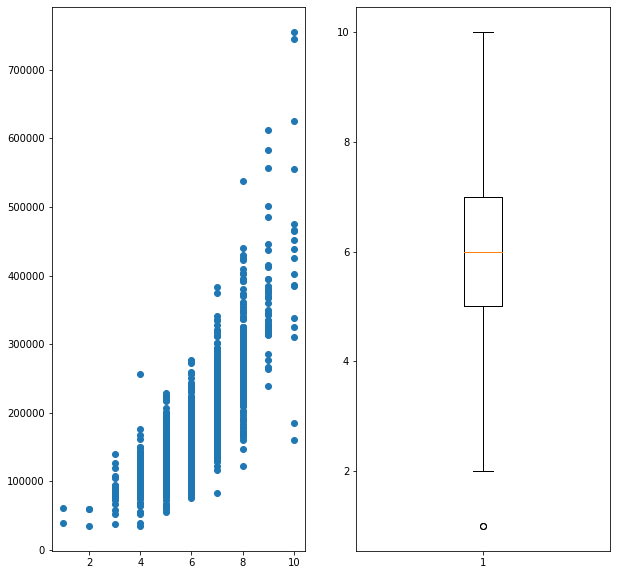

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['OverallQual'])
None

In [ ]:
df.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

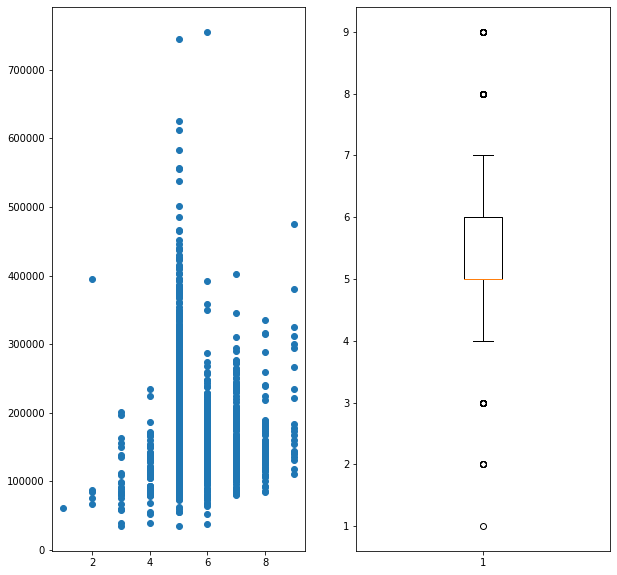

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['OverallCond'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['OverallCond'])
None

In [ ]:
df.YearBuilt.value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

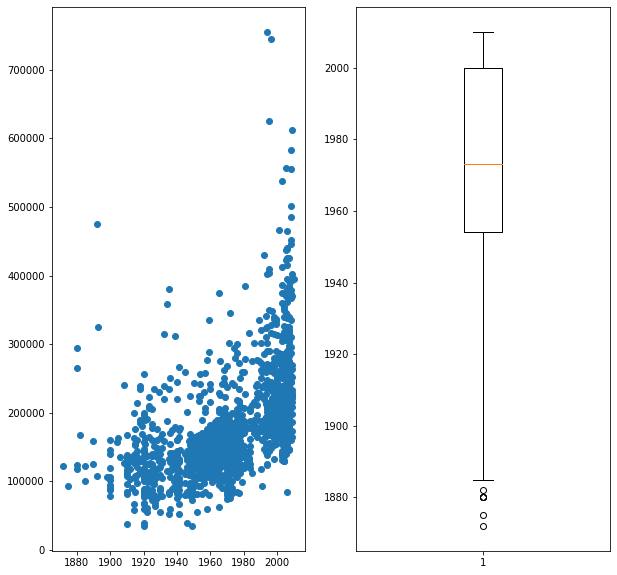

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['YearBuilt'])
None

In [ ]:
df.YearRemodAdd.value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

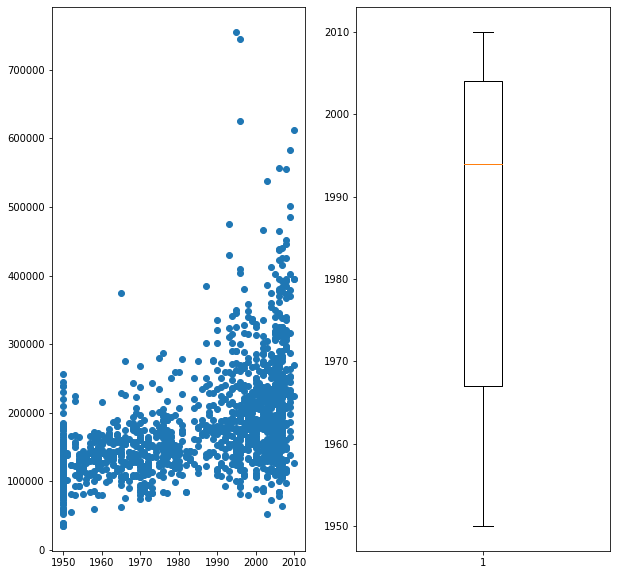

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['YearRemodAdd'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['YearRemodAdd'])
None

In [ ]:
df.BsmtFinSF2.value_counts()

0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64

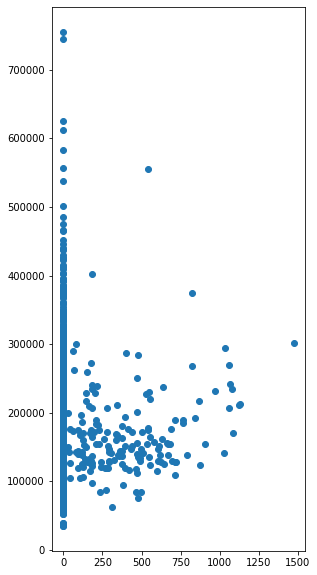

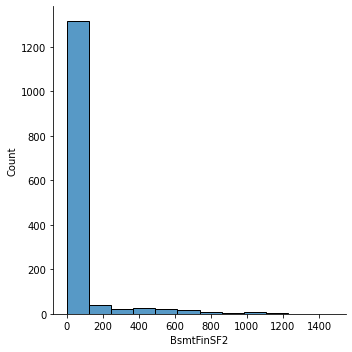

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['BsmtFinSF2'], df['SalePrice'])
sns.displot(df['BsmtFinSF2'])
None

In [ ]:
df.BsmtFinSF1.value_counts()

0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64

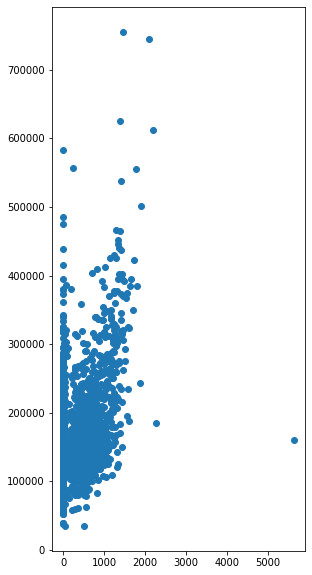

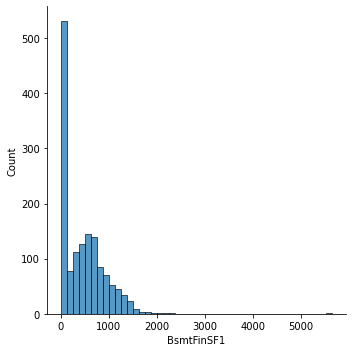

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['BsmtFinSF1'], df['SalePrice'])
sns.displot(df['BsmtFinSF1'])
None

In [ ]:
df.BsmtUnfSF.value_counts()

0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dtype: int64

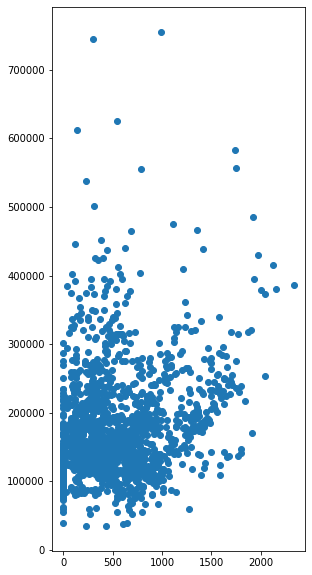

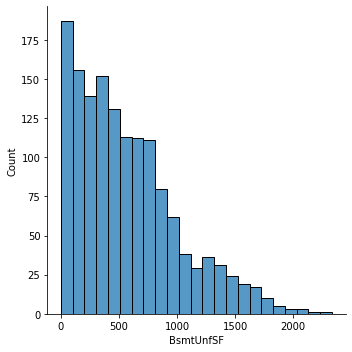

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['BsmtUnfSF'], df['SalePrice'])
sns.displot(df['BsmtUnfSF'])
None

In [ ]:
df.TotalBsmtSF.value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

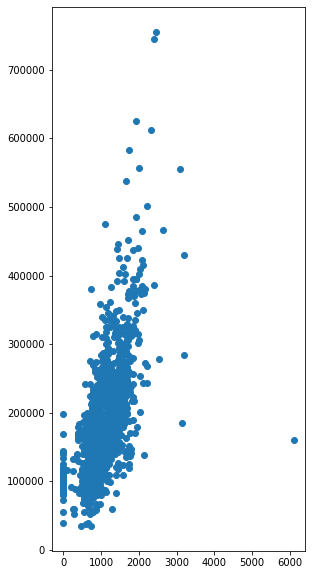

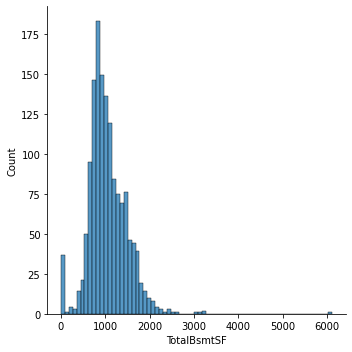

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['TotalBsmtSF'], df['SalePrice'])
sns.displot(df['TotalBsmtSF'])
None

In [ ]:
df['1stFlrSF'].value_counts()

864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: 1stFlrSF, Length: 753, dtype: int64

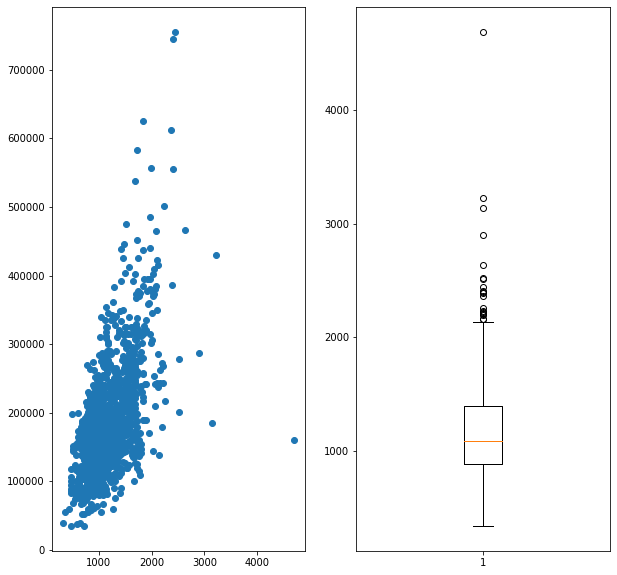

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['1stFlrSF'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['1stFlrSF'])
None

In [ ]:
df['2ndFlrSF'].value_counts()

0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: 2ndFlrSF, Length: 417, dtype: int64

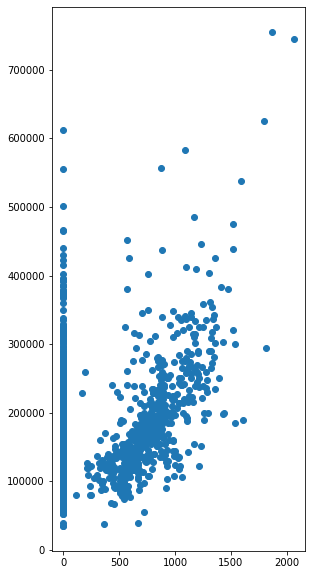

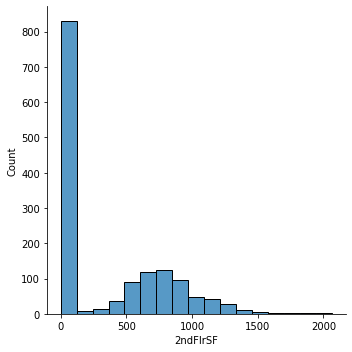

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['2ndFlrSF'], df['SalePrice'])
sns.displot(df['2ndFlrSF'])
None

In [ ]:
df['LowQualFinSF'].value_counts()

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

In [ ]:
df['GrLivArea'].value_counts()

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64

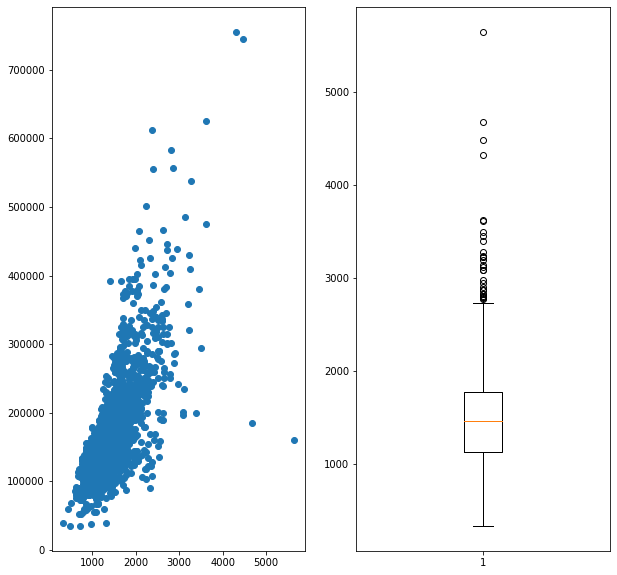

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['GrLivArea'])
None

In [ ]:
df['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [ ]:
df['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [ ]:
df['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [ ]:
df['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [ ]:
df['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

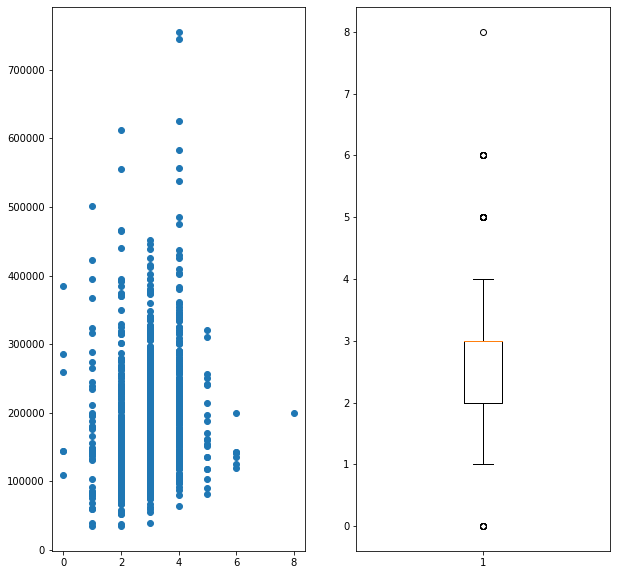

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['BedroomAbvGr'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['BedroomAbvGr'])
None

In [ ]:
df['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [ ]:
df['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

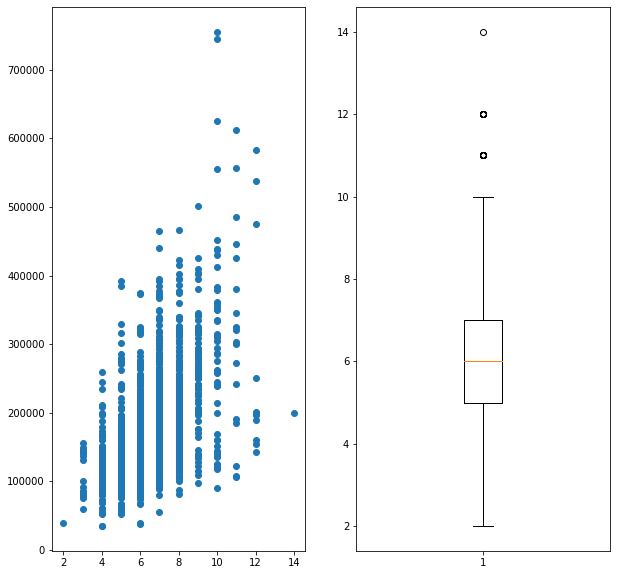

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['TotRmsAbvGrd'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['TotRmsAbvGrd'])
None

In [ ]:
df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [ ]:
df.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

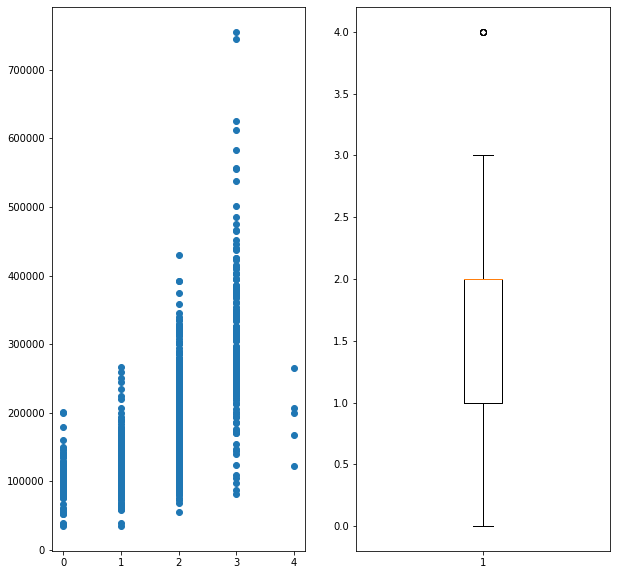

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['GarageCars'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['GarageCars'])
None

In [ ]:
df.GarageArea.value_counts()

0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64

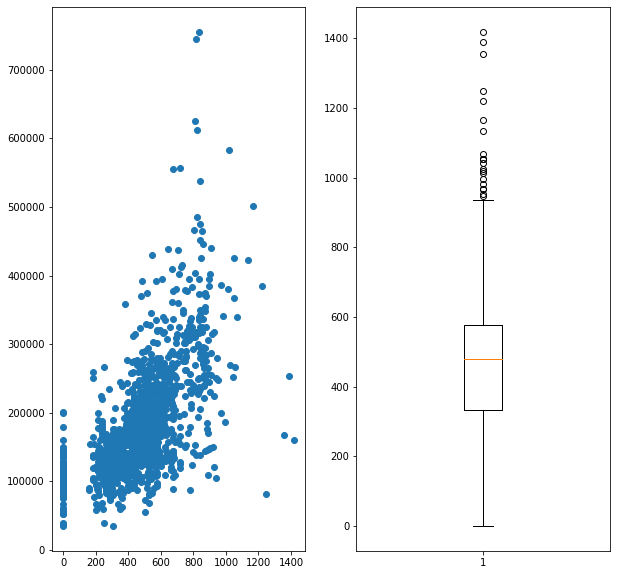

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['GarageArea'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['GarageArea'])
None

In [ ]:
df.WoodDeckSF.value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: WoodDeckSF, Length: 274, dtype: int64

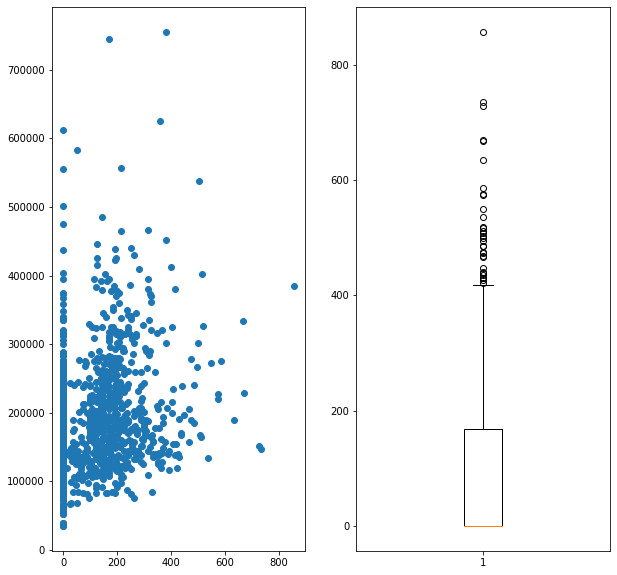

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['WoodDeckSF'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['WoodDeckSF'])
None

In [ ]:
df.OpenPorchSF.value_counts()

0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: OpenPorchSF, Length: 202, dtype: int64

In [ ]:
df.EnclosedPorch.value_counts()

0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64

In [ ]:
df['3SsnPorch'].value_counts()

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

In [ ]:
df.ScreenPorch.value_counts()

0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64

In [ ]:
df.PoolArea.value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [ ]:
df.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [ ]:
df.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

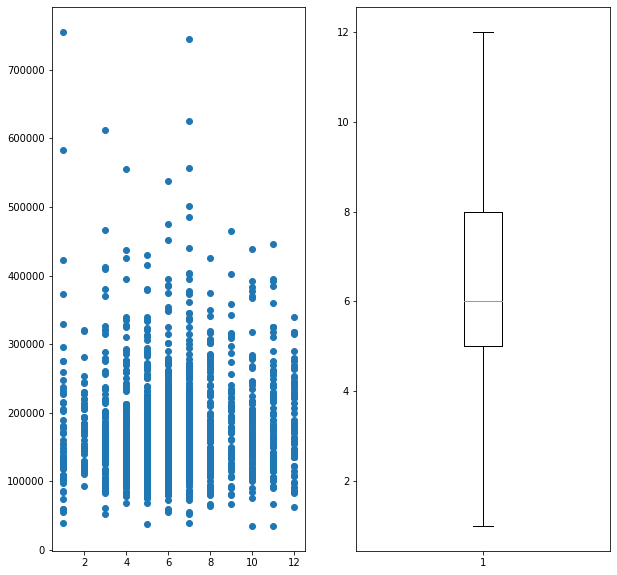

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['MoSold'], df['SalePrice'])
plt.subplot(1, 2, 2)
plt.boxplot(df['MoSold'])
None

In [ ]:
df.YrSold.value_counts()     

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

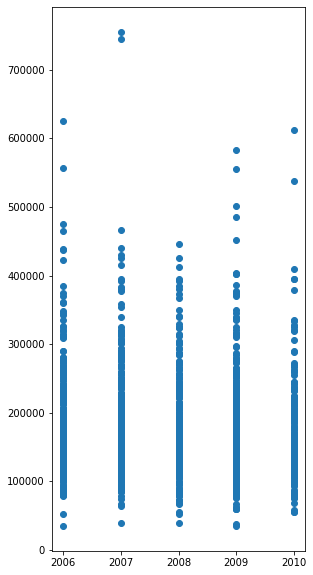

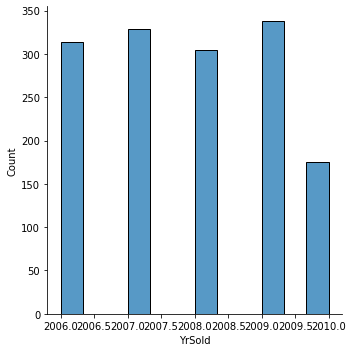

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['YrSold'], df['SalePrice'])
sns.displot(df['YrSold'])
None

#FLOAT

In [ ]:
df.MasVnrArea.value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [ ]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

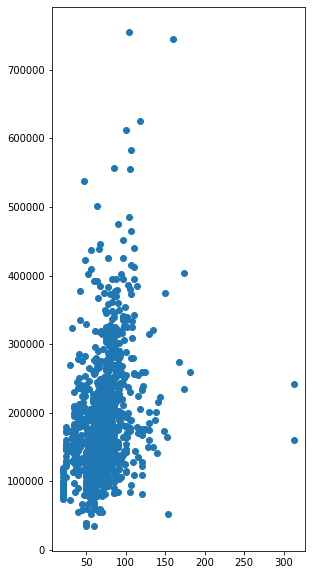

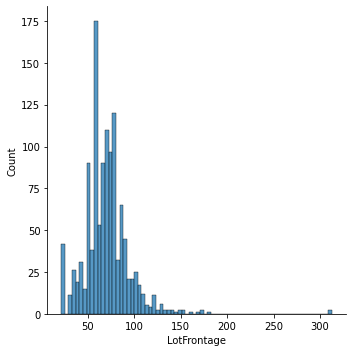

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['LotFrontage'], df['SalePrice'])
sns.displot(df['LotFrontage'])
None

In [ ]:
df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

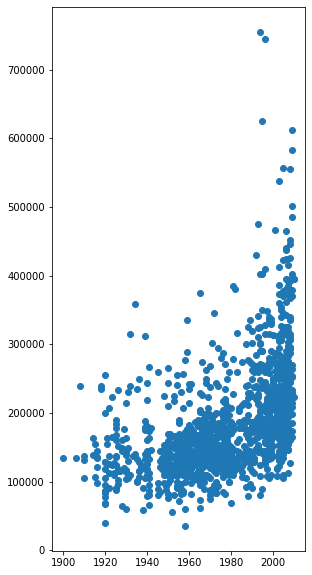

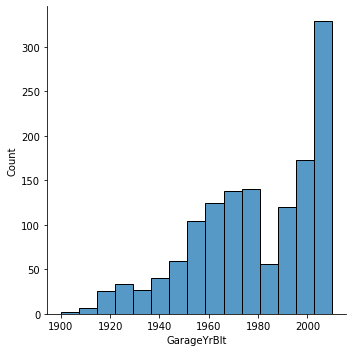

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['GarageYrBlt'], df['SalePrice'])
sns.displot(df['GarageYrBlt'])
None

In [ ]:
float_cols = [
    'LotFrontage',
    'GarageYrBlt'
]

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(df[float_cols])
imputed_float_cols = imp_mean.transform(df[float_cols])

Now i choose the best numerical features (int) for training dataset

In [ ]:
num_cols = [
    'MSSubClass',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'TotalBsmtSF',
    '1stFlrSF',
    'GrLivArea',
    'GarageCars',
    'GarageArea'
]

#Categorial

In [ ]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

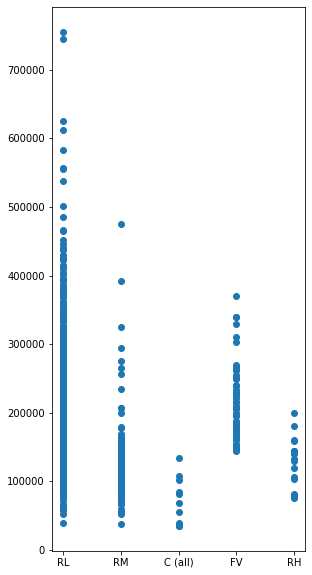

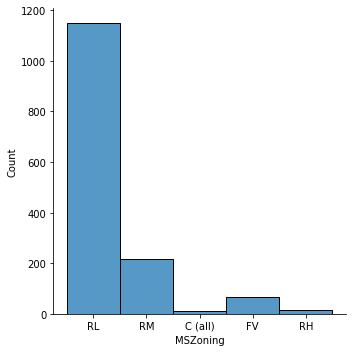

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['MSZoning'], df['SalePrice'])
sns.displot(df['MSZoning'])
None

In [ ]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [ ]:
df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

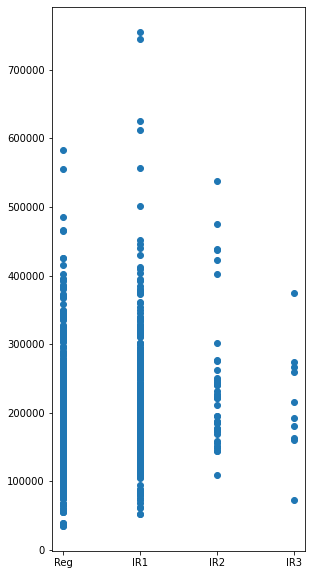

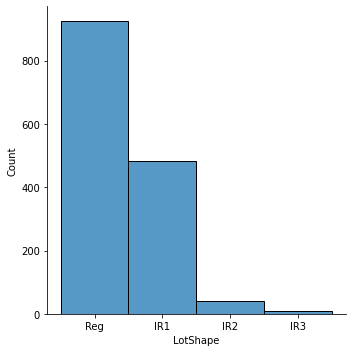

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['LotShape'], df['SalePrice'])
sns.displot(df['LotShape'])
None

In [ ]:
df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [ ]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
df.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

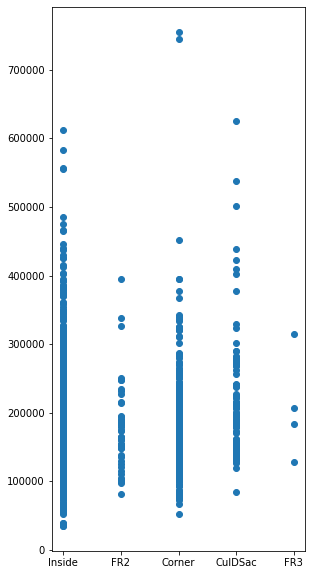

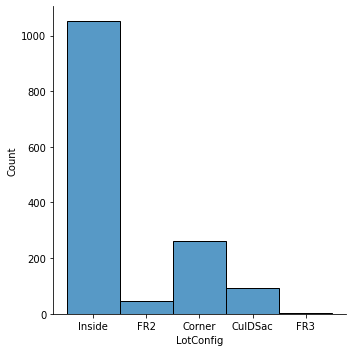

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['LotConfig'], df['SalePrice'])
sns.displot(df['LotConfig'])
None

In [ ]:
df.LandSlope.value_counts()  

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [ ]:
df.Neighborhood.value_counts()  

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

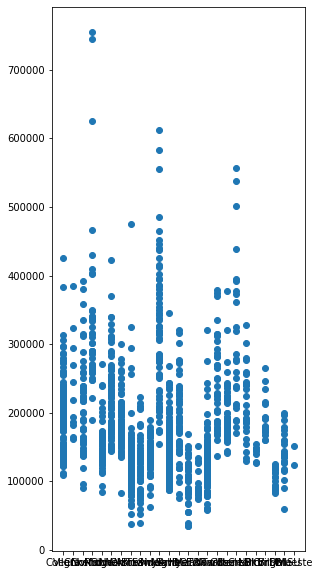

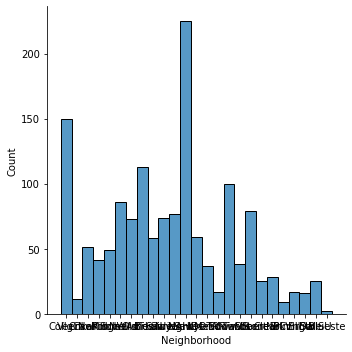

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['Neighborhood'], df['SalePrice'])
sns.displot(df['Neighborhood'])
None

In [ ]:
df.Condition1.value_counts()  

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [ ]:
df.Condition2.value_counts()  

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [ ]:
df.BldgType.value_counts() 

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [ ]:
df.HouseStyle.value_counts() 

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

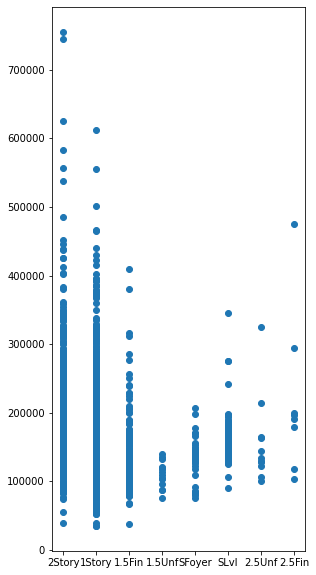

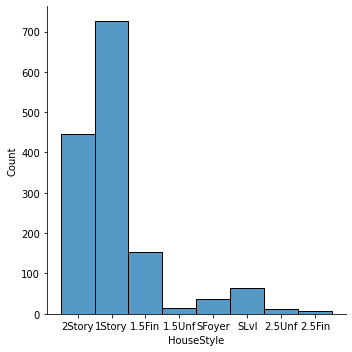

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['HouseStyle'], df['SalePrice'])
sns.displot(df['HouseStyle'])
None

In [ ]:
df.RoofStyle.value_counts() 

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

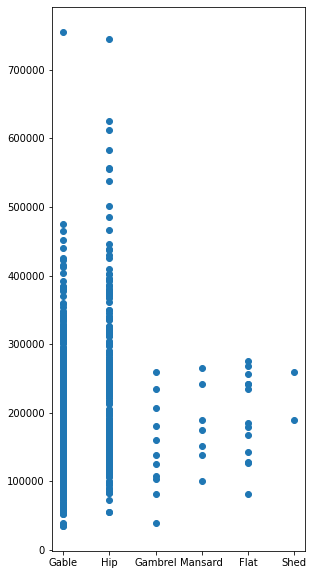

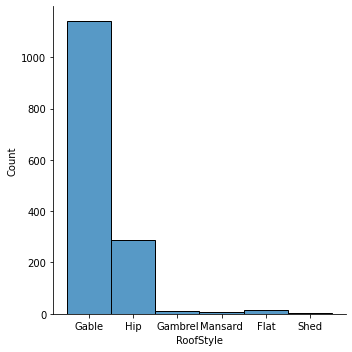

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['RoofStyle'], df['SalePrice'])
sns.displot(df['RoofStyle'])
None

In [ ]:
df.RoofMatl.value_counts()     

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [ ]:
df.Exterior1st.value_counts()  

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

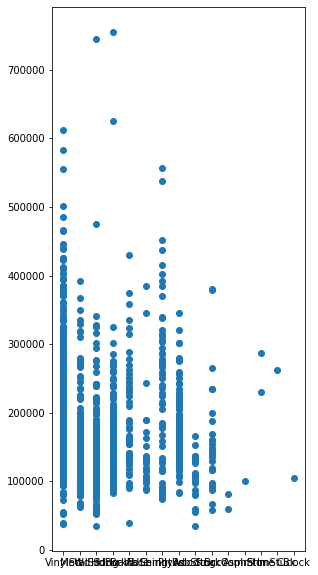

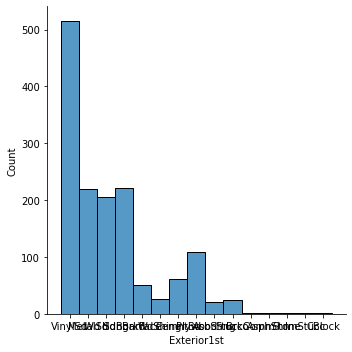

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['Exterior1st'], df['SalePrice'])
sns.displot(df['Exterior1st'])
None

In [ ]:
df.Exterior2nd.value_counts()  

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

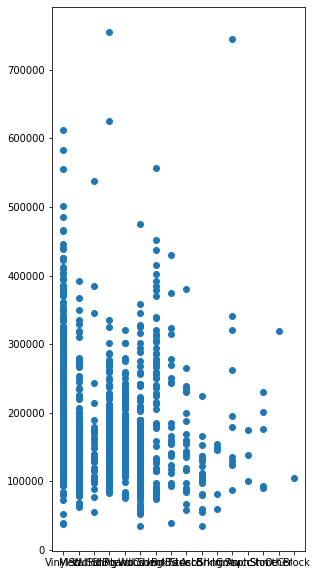

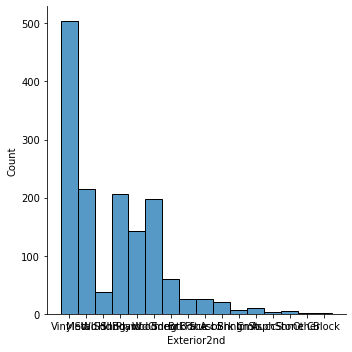

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['Exterior2nd'], df['SalePrice'])
sns.displot(df['Exterior2nd'])
None

In [ ]:
df.MasVnrType.value_counts() 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<Figure size 720x720 with 0 Axes>

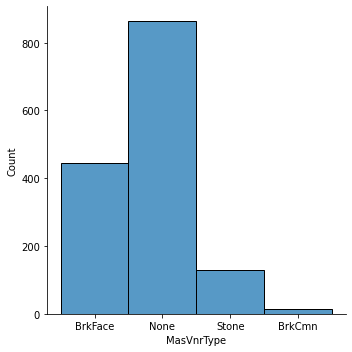

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df['MasVnrType'])
None

In [ ]:
df.ExterQual.value_counts() 

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

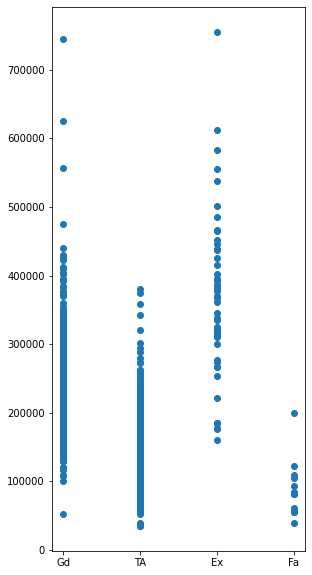

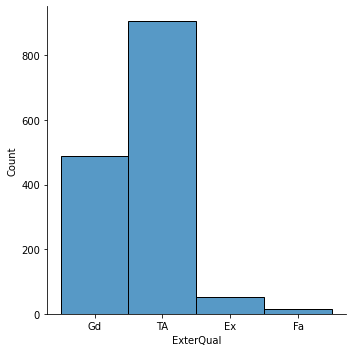

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['ExterQual'], df['SalePrice'])
sns.displot(df['ExterQual'])
None

In [ ]:
df.ExterCond.value_counts()    

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [ ]:
df.Foundation.value_counts() 

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

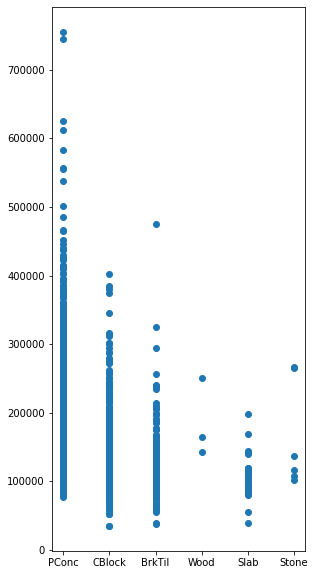

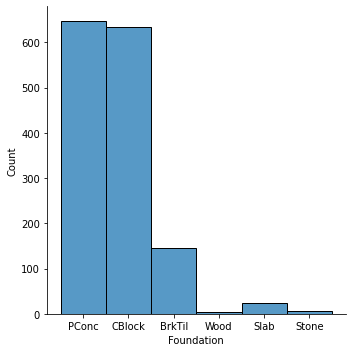

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['Foundation'], df['SalePrice'])
sns.displot(df['Foundation'])
None

In [ ]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<Figure size 720x720 with 0 Axes>

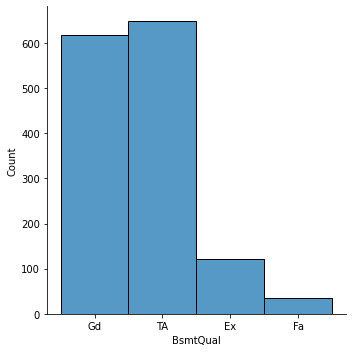

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df['BsmtQual'])
None

In [ ]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [ ]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

<Figure size 720x720 with 0 Axes>

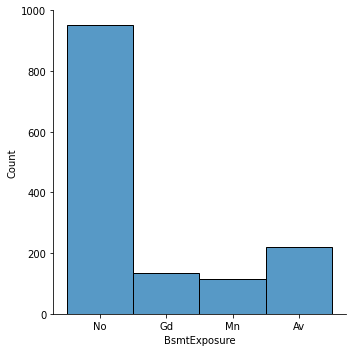

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df['BsmtExposure'])
None

In [ ]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

<Figure size 720x720 with 0 Axes>

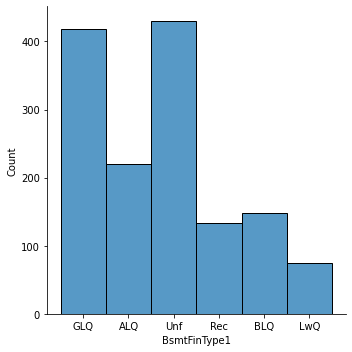

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df['BsmtFinType1'])
None

In [ ]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [ ]:
df.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

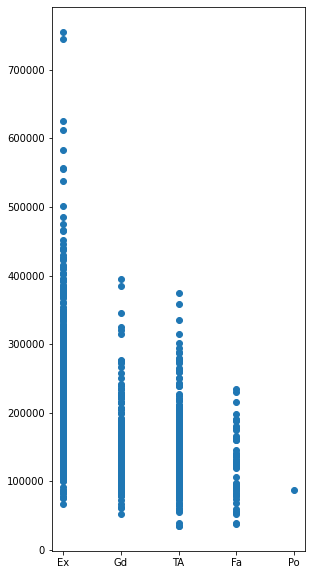

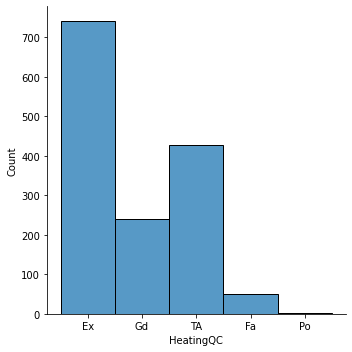

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['HeatingQC'], df['SalePrice'])
sns.displot(df['HeatingQC'])
None

In [ ]:
df.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [ ]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
df.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

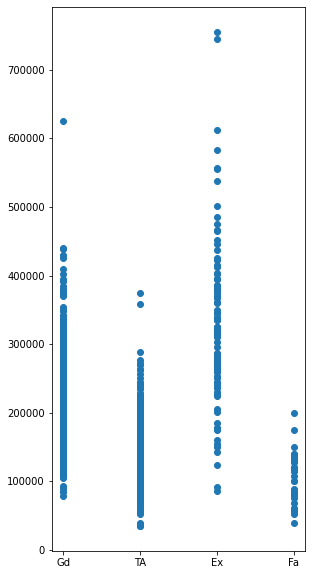

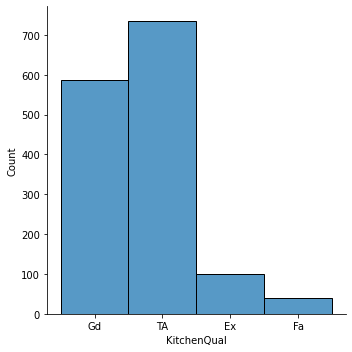

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['KitchenQual'], df['SalePrice'])
sns.displot(df['KitchenQual'])
None

In [ ]:
df.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [ ]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<Figure size 720x720 with 0 Axes>

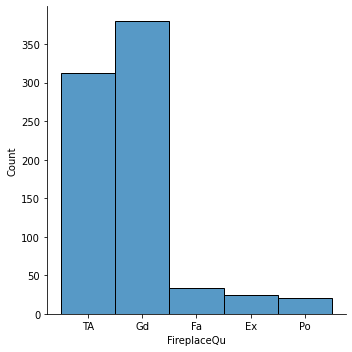

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df['FireplaceQu'])
None #At all 770 

In [ ]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<Figure size 720x720 with 0 Axes>

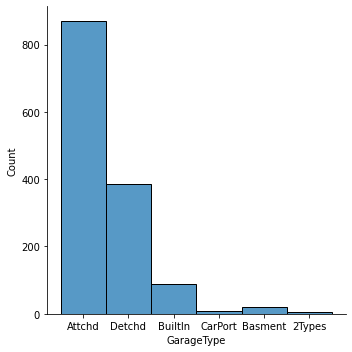

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df['GarageType'])
None

In [ ]:
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

<Figure size 720x720 with 0 Axes>

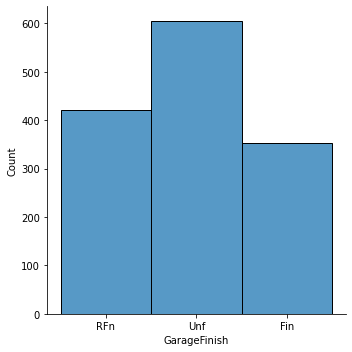

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df['GarageFinish'])
None

In [ ]:
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [ ]:
df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
df.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [ ]:
df.SaleType.value_counts() 

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

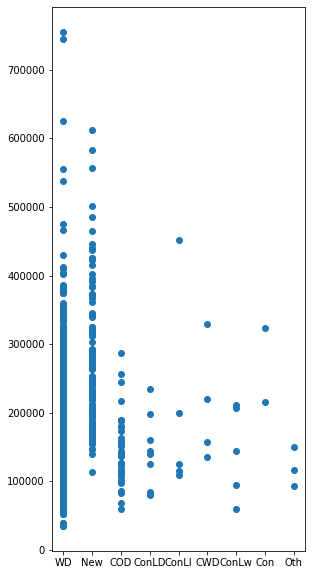

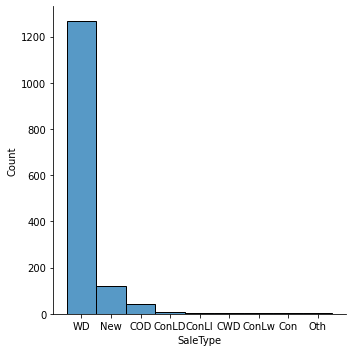

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['SaleType'], df['SalePrice'])
sns.displot(df['SaleType'])
None

In [ ]:
df.SaleCondition.value_counts() 

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

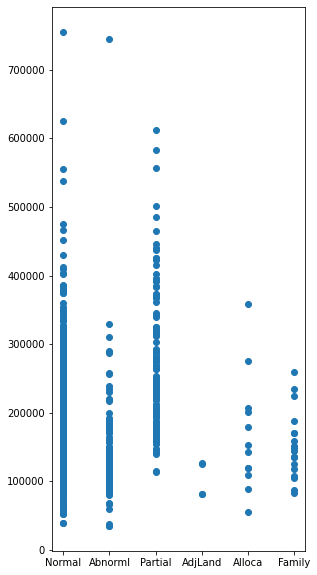

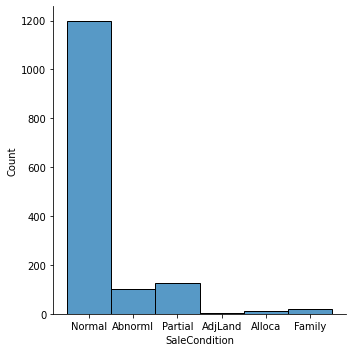

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(df['SaleCondition'], df['SalePrice'])
sns.displot(df['SaleCondition'])
None

In [ ]:
cat_cols = [
    'MSZoning',
    'LotShape',
    'LotConfig',
    'Neighborhood',
    'HouseStyle',
    'RoofStyle',
    'Exterior1st',
    'Exterior2nd',
    'ExterQual',
    'Foundation',
    'HeatingQC',
    'KitchenQual',
    'SaleType',
    'SaleCondition'
]

#Faeture Ingeneering

In [ ]:
df = pd.get_dummies(df, columns = cat_cols)

cat_cols_new = []
for col_name in cat_cols:
  cat_cols_new.extend(filter(lambda x:
                             x.startswith(col_name),
                             df.columns))
cat_cols = cat_cols_new

In [ ]:
target = ['SalePrice']

In [ ]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
X = pca.fit_transform(df[num_cols + cat_cols])

UFuncTypeError: ignored

In [ ]:
y = target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size = 0.2)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def median_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100


def print_metrics(prediction, val_y):
    val_mae = mean_absolute_error(val_y, prediction)
    median_AE = median_absolute_error(val_y, prediction)
    r2 = r2_score(val_y, prediction)

    print('')
    print('R\u00b2: {:.2}'.format(r2))
    print('')
    print('Средняя абсолютная ошибка: {:.3} %'.format(mean_absolute_percentage_error(val_y, prediction)))
    print('Медианная абсолютная ошибка: {:.3} %'.format(median_absolute_percentage_error(val_y, prediction)))

#MODEL

In [ ]:
model = RandomForestRegressor(n_estimators=2000, 
                              n_jobs=-1,  
                              bootstrap=False,
                              criterion='mse',
                              max_features=3,
                              random_state=1,
                              max_depth=55,
                              min_samples_split=5
                              )


model.fit(X_train, y_train)


prediction = model.predict(X_test).round(0)

print_metrics(prediction, y_test)


R²: 0.77

Средняя абсолютная ошибка: 44.6 %
Медианная абсолютная ошибка: 31.7 %


In [ ]:
xgb_model = xgb.XGBRegressor(objective ='reg:gamma', 
                             learning_rate = 0.01,
                             max_depth = 45, 
                             n_estimators = 2000,
                             nthread = -1,
                             eval_metric = 'gamma-nloglik', 
                             )

xgb_model.fit(X_train, y_train)


xgb_prediction = xgb_model.predict(X_test).round(0)


print_metrics(xgb_prediction, y_test)


R²: 0.86

Средняя абсолютная ошибка: 47.7 %
Медианная абсолютная ошибка: 33.9 %


In [ ]:
prediction_final = prediction * 0.5 + xgb_prediction * 0.5 


print_metrics(prediction_final, y_test)


R²: 0.85

Средняя абсолютная ошибка: 45.9 %
Медианная абсолютная ошибка: 32.7 %


#Testdata

In [ ]:
data = pd.read_csv('test.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
cat_cols1 = [
    'MSZoning',
    'LotShape',
    'LotConfig',
    'Neighborhood',
    'HouseStyle',
    'RoofStyle',
    'Exterior1st',
    'Exterior2nd',
    'ExterQual',
    'Foundation',
    'HeatingQC',
    'KitchenQual',
    'SaleType',
    'SaleCondition'
]

num_cols1 = [
    'MSSubClass',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'TotalBsmtSF',
    '1stFlrSF',
    'GrLivArea',
    'GarageCars',
    'GarageArea'
]

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
target_data = pd.read_csv('sample_submission.csv')
target_data.head()

,SalePrice,Saleprice
0,169277.052498,119191.195
1,187758.393989,161581.580
2,183583.683570,162754.800
3,179317.477511,182438.110
4,150730.079977,218356.480


In [ ]:
target1 = target_data['SalePrice']

In [ ]:
data = pd.get_dummies(data, columns = cat_cols1)

cat_cols_new = []
for col_name in cat_cols:
  cat_cols_new.extend(filter(lambda x:
                             x.startswith(col_name),
                             data.columns))
cat_cols1 = cat_cols_new

In [ ]:
from sklearn.preprocessing import StandardScaler

pca1 = StandardScaler()
X = pca1.fit_transform(data[num_cols1 + cat_cols1])

In [ ]:
xgb_model = xgb.XGBRegressor(objective ='reg:gamma', 
                             learning_rate = 0.01,
                             max_depth = 45, 
                             n_estimators = 2000,
                             nthread = -1,
                             eval_metric = 'gamma-nloglik', 
                             )
xgb_model.fit(X_train, y_train)
y_pred1 = xgb_model.predict(X)

In [ ]:
y_pred1

array([119191.195, 161581.58 , 162754.8  , ..., 157808.14 , 121134.016,
       233764.2  ], dtype=float32)

In [ ]:
target_data['Saleprice'] = y_pred1
target_data.to_csv('sample_submission.csv', index=False)

In [ ]:
target_data.head()

,Saleprice
0,119191.195312
1,161581.578125
2,162754.796875
3,182438.109375
4,218356.484375


In [ ]:
target_data = target_data.drop(columns = ['Id'])

In [ ]:
print_metrics(y_pred1, target1)


R²: -1.9e+01

Средняя абсолютная ошибка: 31.1 %
Медианная абсолютная ошибка: 25.9 %


In [ ]:
datas = pd.read_csv('sample_submission.csv')
datas.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
datas['SalePrice'] = y_pred1

In [ ]:
datas.shape

(1459, 2)

In [ ]:
datas.head()

,Id,SalePrice
0,1461,119191.195312
1,1462,161581.578125
2,1463,162754.796875
3,1464,182438.109375
4,1465,218356.484375


In [ ]:
datas.to_csv('submission.csv', index=False)